<a href="https://colab.research.google.com/github/Teasotea/IntelectualDataAnalysis/blob/main/lab3/IAD_Lab3_datasetB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №3.

### Завдання
Початкові дані (два набори) і Хід виконання роботи такі ж як для Лабораторної роботи №2.
У кого в роботі №2 була класифікація, той у роботі №3 використовує `sklearn.neural_network.MLPClassifier.`

Почати з одношарової моделі нейронної мережі і визначити чи достатньо буде одношарової моделі для даних. Перевірте скільки нейронів в одношаровій моделі буде достатньо для задовільного розв'язання задачі бінарної класифікації.

# Import Libraries & Load Data

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
from itertools import cycle
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
# dataset B
data2 = pd.read_csv('/content/dataset_Malicious_and_Benign_Websites.csv')

In [5]:
data2.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


# Exploratory Data Analysis (Data Visualization)

In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [7]:
cat_features = ['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO']
date_features = ['WHOIS_REGDATE', 	'WHOIS_UPDATED_DATE']
target = 'Type'

In [8]:
data2 = data2.replace(['None', 'b'], float('nan'))

In [9]:
print(data2.isnull().sum())

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                129
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


In [10]:
data2 = data2.dropna(subset=date_features)

In [11]:
data2[date_features].iloc[:4]

,WHOIS_REGDATE,WHOIS_UPDATED_DATE
3,7/10/1997 4:00,12/09/2013 0:45
4,12/05/1996 0:00,11/04/2017 0:00
5,3/08/2016 14:30,3/10/2016 3:45
6,29/07/2002 0:00,1/07/2016 0:00


In [12]:
data2[date_features] = data2[date_features].apply(pd.to_datetime)

In [13]:
data2["reg_month"] = data2["WHOIS_REGDATE"].apply(lambda x: x.month)
data2["reg_day"] = data2["WHOIS_REGDATE"].apply(lambda x: x.day)
data2["reg_year"] = data2["WHOIS_REGDATE"].apply(lambda x: x.year)

data2["updated_month"] = data2["WHOIS_UPDATED_DATE"].apply(lambda x: x.month)
data2["updated_day"] = data2["WHOIS_UPDATED_DATE"].apply(lambda x: x.day)
data2["updated_year"] = data2["WHOIS_UPDATED_DATE"].apply(lambda x: x.year)

In [14]:
data2[cat_features].nunique()

URL               1640
CHARSET              8
SERVER             227
WHOIS_COUNTRY       46
WHOIS_STATEPRO     179
dtype: int64

In [15]:
data2['CHARSET'].value_counts() 

UTF-8           605
ISO-8859-1      407
utf-8           357
us-ascii        144
iso-8859-1      117
windows-1251      1
ISO-8859          1
windows-1252      1
Name: CHARSET, dtype: int64

In [16]:
encoder = OneHotEncoder(sparse=False)
enc = encoder.fit_transform(np.array(data2["CHARSET"]).reshape(-1,1))
enc_df = pd.DataFrame(enc)

In [17]:
data2.reset_index(drop=True, inplace=True)

In [18]:
data2 = data2.join(enc_df)

In [19]:
labelencoder = LabelEncoder()
data2['URL'] = labelencoder.fit_transform(data2['URL'])
data2['SERVER'] = labelencoder.fit_transform(data2['SERVER'])
data2['WHOIS_COUNTRY'] = labelencoder.fit_transform(data2['WHOIS_COUNTRY'])
data2['WHOIS_STATEPRO'] = labelencoder.fit_transform(data2['WHOIS_STATEPRO'])

In [20]:
data2["CONTENT_LENGTH"] = data2["CONTENT_LENGTH"].fillna(value=data2["CONTENT_LENGTH"].mean())

In [21]:
data2.fillna(0, inplace=True)

In [22]:
data2.drop(columns=["CHARSET","WHOIS_REGDATE","WHOIS_UPDATED_DATE"], inplace=True)

Дізнаємося, які класи присутні в даних

In [23]:
data2[target].value_counts()

0    1484
1     156
Name: Type, dtype: int64

Бачимо, що датасет **незбалансований**

In [24]:
data2.corr()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,reg_month,reg_day,reg_year,updated_month,updated_day,updated_year,0,1,2,3,4,5,6,7,8
URL,1.000000,0.139589,0.181572,-0.112688,2.275048e-03,-0.146287,-0.057176,0.073468,0.007049,0.128255,-0.008383,0.087969,0.081958,0.059893,-0.007498,0.087969,0.231672,0.508155,0.100141,0.028226,0.149155,-0.127703,-0.034532,0.038994,0.002478,0.016016,0.070631,-0.038467,-0.026272,-0.057875,0.035244,2.214803e-02,-0.019272
URL_LENGTH,0.139589,1.000000,0.924049,-0.128142,1.024632e-01,-0.138071,-0.089386,-0.040783,-0.044165,-0.042960,-0.027905,-0.043928,-0.035261,-0.015401,-0.028104,-0.043928,-0.060011,0.266566,0.120051,0.016165,0.011227,-0.046712,-0.016424,-0.034486,-0.013059,-0.091884,0.198963,-0.079010,-0.062414,-0.034610,-0.018346,-1.129663e-02,-0.045626
NUMBER_SPECIAL_CHARACTERS,0.181572,0.924049,1.000000,-0.123505,1.729063e-01,-0.144943,-0.095271,-0.042041,-0.044002,-0.053289,-0.024623,-0.045222,-0.034610,-0.015260,-0.024838,-0.045222,-0.060063,0.343159,0.109974,-0.003556,0.023197,-0.050695,-0.056777,-0.012048,0.004522,-0.091801,0.213964,-0.091509,-0.100201,-0.021520,-0.011313,-1.131322e-02,-0.035983
SERVER,-0.112688,-0.128142,-0.123505,1.000000,4.575717e-03,0.195351,-0.043964,0.000796,0.048834,0.054264,-0.020494,0.006761,-0.006657,-0.020709,-0.020196,0.006761,0.083859,-0.229859,-0.107783,-0.010395,-0.148482,0.069305,-0.085861,-0.018747,-0.031308,0.084570,-0.098889,-0.166547,0.057411,0.089225,-0.030064,9.740838e-03,0.034651
CONTENT_LENGTH,0.002275,0.102463,0.172906,0.004576,1.000000e+00,-0.035398,0.009666,0.026129,-0.003308,-0.012771,0.000895,0.024166,0.028413,0.051867,0.000821,0.024166,-0.019492,-0.042458,0.011822,0.010291,-0.095265,0.034588,0.069302,0.019997,-0.006122,-0.053357,0.075576,-0.106522,-0.139233,0.133405,-0.011875,-9.935999e-18,-0.018468
WHOIS_COUNTRY,-0.146287,-0.138071,-0.144943,0.195351,-3.539813e-02,1.000000,-0.018656,0.001082,0.012420,0.081149,-0.054174,0.008770,-0.004599,-0.004754,-0.053758,0.008770,0.110610,-0.259963,-0.132521,0.026710,-0.282202,0.057894,0.142873,-0.091368,0.022188,0.016493,-0.109036,0.010058,0.047615,0.068318,0.010183,1.018256e-02,0.002745
WHOIS_STATEPRO,-0.057176,-0.089386,-0.095271,-0.043964,9.665872e-03,-0.018656,1.000000,-0.021549,-0.064762,0.086663,-0.032677,-0.018728,-0.018677,-0.012219,-0.032523,-0.018728,0.036212,-0.056060,0.098254,-0.089852,0.013031,0.073338,0.049142,-0.025846,0.039966,0.036360,-0.099628,0.128673,0.111222,-0.080822,-0.010056,2.898565e-02,-0.005095
TCP_CONVERSATION_EXCHANGE,0.073468,-0.040783,-0.042041,0.000796,2.612893e-02,0.001082,-0.021549,1.000000,0.547082,0.318623,0.471180,0.997841,0.992147,0.872793,0.472460,0.997841,0.341543,-0.048732,-0.003466,0.061749,-0.025734,0.022870,0.019177,-0.002568,-0.004777,0.032185,-0.008002,-0.041820,-0.023398,0.018983,-0.008426,-5.198856e-04,-0.002299
DIST_REMOTE_TCP_PORT,0.007049,-0.044165,-0.044002,0.048834,-3.308029e-03,0.012420,-0.064762,0.547082,1.000000,0.206367,0.816848,0.552124,0.576193,0.233616,0.817834,0.552124,0.276174,-0.076449,-0.076582,0.027085,-0.025442,0.026498,0.050897,-0.013957,-0.006315,-0.007371,0.014992,-0.049934,-0.020530,0.035703,-0.006315,-6.314834e-03,0.005322
REMOTE_IPS,0.128255,-0.042960,-0.053289,0.054264,-1.277079e-02,0.081149,0.086663,0.318623,0.206367,1.000000,0.022410,0.348784,0.294301,0.160108,0.024498,0.348784,0.548302,-0.129713,-0.042793,0.014413,-0.035895,0.004061,0.021346,0.003675,0.000146,0.021703,-0.007009,-0.043718,-0.007047,0.016620,-0.007130,-7.130052e-03,0.011409


# Split data into train and test

In [25]:
data2.columns = [                      'URL',                'URL_LENGTH',
       'NUMBER_SPECIAL_CHARACTERS',                    'SERVER',
                  'CONTENT_LENGTH',             'WHOIS_COUNTRY',
                  'WHOIS_STATEPRO', 'TCP_CONVERSATION_EXCHANGE',
            'DIST_REMOTE_TCP_PORT',                'REMOTE_IPS',
                       'APP_BYTES',        'SOURCE_APP_PACKETS',
              'REMOTE_APP_PACKETS',          'SOURCE_APP_BYTES',
                'REMOTE_APP_BYTES',               'APP_PACKETS',
                 'DNS_QUERY_TIMES',                      'Type',
                       'reg_month',                   'reg_day',
                        'reg_year',             'updated_month',
                     'updated_day',              'updated_year',
                                 '0',                           '1',
                                 '2',                           '3',
                                 '4',                           '5',
                                 '6',                           '7',
                                 '8']

In [26]:
cols = list(data2.columns)
cols.remove(target)

In [27]:
X_Train, X_Test,y_Train, y_Test  = train_test_split(data2[cols], data2[target], test_size=0.1, random_state=42)

In [28]:
X_Train.shape, y_Train.shape, X_Test.shape, y_Test.shape

((1476, 32), (1476,), (164, 32), (164,))

# Data Normalization

In [34]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [35]:
X_Train = minmax_scaler.fit_transform(X_Train)
X_Test = minmax_scaler.transform(X_Test)

X_Train = standard_scaler.fit_transform(X_Train)
X_Test = standard_scaler.transform(X_Test)

# Train Model

In [30]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,)
             ]
        }
       ]

In [36]:
clf = GridSearchCV(MLPClassifier(max_iter=10000), param_grid, cv=3,
                           scoring='accuracy')
clf.fit(X_Train, y_Train)


print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'activation': 'logistic', 'hidden_layer_sizes': (12,), 'solver': 'lbfgs'}


In [39]:
params = {'activation': 'logistic', 'hidden_layer_sizes': (12,), 'solver': 'lbfgs'}

In [40]:
model = MLPClassifier(max_iter=10000, **params)
model.fit(X_Train, y_Train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(12,), max_iter=10000,
              solver='lbfgs')

# Predict

In [41]:
predictions = model.predict(X_Test)

In [42]:
pred_score = model.predict_proba(X_Test)

In [43]:
print(f1_score(y_Test, predictions))

1.0


In [44]:
print(classification_report(y_Test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00        12

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164



# Cross-validation 

In [49]:
score = cross_val_score(model, data2[cols], data2[target], scoring='f1', cv = 10)
print(score)

[1.         1.         1.         1.         1.         1.
 1.         0.96969697 1.         1.        ]


In [50]:
print(score.mean())

0.9969696969696968


# Evaluation

• confusion matrix

• precision

• recall

• F1 score

• побудувати криву точностi-повноти (precision-recall (PR) curve), ROC-криву, показник AUC.

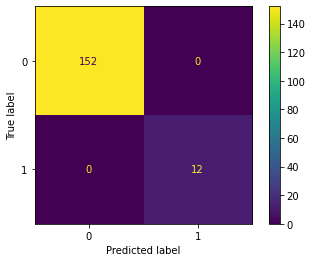

In [51]:
cm = confusion_matrix(y_Test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [52]:
encoder = OneHotEncoder(sparse=False)
y_test = encoder.fit_transform(np.array(y_Test).reshape(-1, 1))

In [56]:
roc_auc_score(y_test, pred_score, multi_class = 'ovr', average = 'macro')

1.0